In [101]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [102]:
train_feature_data = pd.read_csv("../data/interim/train_feature_data.csv")

test_feature_data = pd.read_csv("../data/interim/test_feature_data.csv")

In [103]:
train_feature_data.shape

(891, 6)

### 1. Imputación de variables numéricas

In [104]:
col_NA=[]

for col in train_feature_data:
    if train_feature_data[col].isnull().mean()>0:
        col_NA.append(col)

col_NA

['Age']

In [105]:
Numericas=[]
categoricas=[]

for col in col_NA:
    if train_feature_data[col].dtypes=='float64':
        Numericas.append(col)
    else:
        categoricas.append(col)

print("Numericas:")
print(Numericas)
print("")
print("Categoricas")
print(categoricas)

Numericas:
['Age']

Categoricas
[]


In [106]:
train_feature_data[Numericas].isnull().mean()*100

Age    19.86532
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

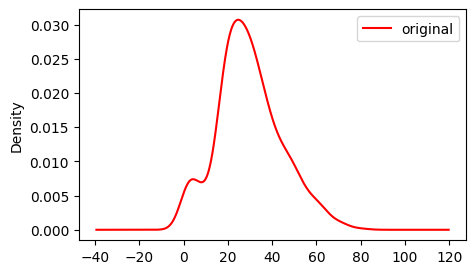

In [107]:
fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

train_feature_data['Age'].plot.density(color='red',label='original')
ax.legend()
plt.show

In [108]:
mean_age=train_feature_data['Age'].mean()
median_age=train_feature_data['Age'].median()

train_feature_data['age_mean']=np.round(train_feature_data['Age'].fillna(mean_age),0)
train_feature_data['age_median']=np.round(train_feature_data['Age'].fillna(median_age),0)

print(train_feature_data['Age'].var())
print(train_feature_data['age_mean'].var())
print(train_feature_data['age_median'].var())


211.01912474630802
169.02154125524913
169.46348882079218


<function matplotlib.pyplot.show(close=None, block=None)>

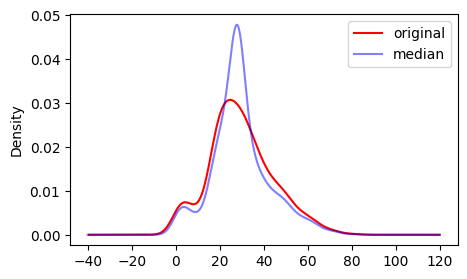

In [109]:
fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

train_feature_data['Age'].plot.density(color='red',label='original')
#hotel_data['adults_mean'].plot.density(color='blue',label='mean',alpha=0.5)
train_feature_data['age_median'].plot.density(color='blue',label='median',alpha=0.5)
ax.legend()
plt.show

In [110]:
train_feature_data['Age'] = train_feature_data['age_median']

In [111]:
train_feature_data=train_feature_data.drop(['age_median','age_mean'], axis=1)

In [112]:
train_feature_data

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,28.0,1,2
889,1,1,male,26.0,0,0


### Codificacion de Variables Categoricas

In [113]:

train_feature_data = pd.get_dummies(train_feature_data, columns=['Sex'],drop_first=True)



In [114]:
train_feature_data

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True
...,...,...,...,...,...,...
886,0,2,27.0,0,0,True
887,1,1,19.0,0,0,False
888,0,3,28.0,1,2,False
889,1,1,26.0,0,0,True


### Tratamiento de outliers

In [115]:
continuas=[col for col in train_feature_data.columns if(train_feature_data[col].dtypes in ['float64','int64'])and (len(train_feature_data[col].unique())>30)]
continuas


['Age']

Age


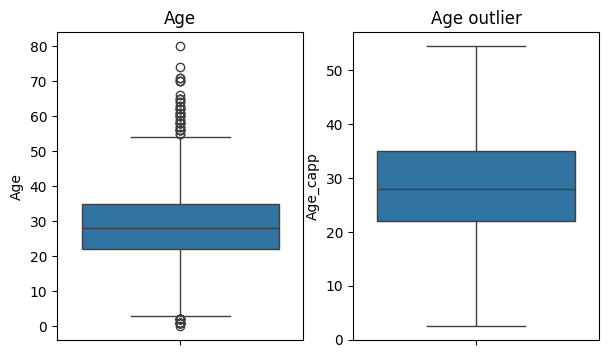

In [116]:
continuas_outliers=['Age']

for col in continuas_outliers:

    IQR=train_feature_data[col].quantile(0.75)-train_feature_data[col].quantile(0.25)
    IQR
    LL=train_feature_data[col].quantile(0.25)-1.5*IQR
    UL=train_feature_data[col].quantile(0.75)+1.5*IQR

    train_feature_data[col+'_capp']=np.where(train_feature_data[col]>UL,UL,np.where(train_feature_data[col]<LL,LL,train_feature_data[col]))
    
    print(col)

    plt.figure(figsize=(7,4))

    plt.subplot(121)
    plt.title(col)
    sns.boxplot(y=train_feature_data[col])

    plt.subplot(122)
    plt.title(col + ' outlier')
    sns.boxplot(y=train_feature_data[col+'_capp'])
 
   
    plt.show()

In [117]:
train_feature_data['Age'] = train_feature_data['Age_capp']

In [118]:
import seaborn as sns

In [119]:
train_feature_data=train_feature_data.drop(['Age_capp'], axis=1)

In [120]:
train_feature_data

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True
...,...,...,...,...,...,...
886,0,2,27.0,0,0,True
887,1,1,19.0,0,0,False
888,0,3,28.0,1,2,False
889,1,1,26.0,0,0,True


### Transformacion de Variable continua

In [121]:
def plot_sensisty_qq(df, variable):

    plt.figure(figsize=(6,4))

    plt.subplot(121)
    df[variable].hist(bins=30)
    

    plt.subplot(122)
    stats.probplot(df[variable],dist="norm",plot=plt)

    plt.show()

In [122]:
import scipy.stats as stats

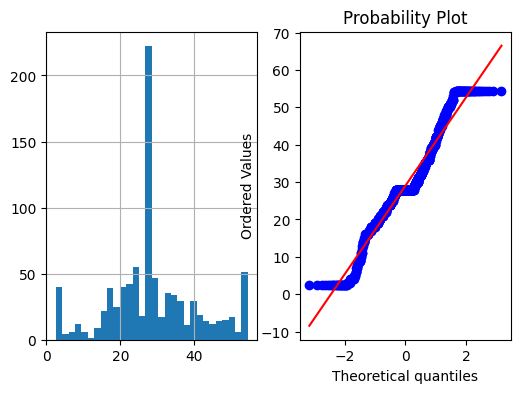

In [123]:
plot_sensisty_qq(train_feature_data, 'Age')

In [124]:
#BoxCox   

    col='Age'
    print(col)
    print(col+" Original")
    plot_sensisty_qq(train_feature_data,col)

    print(col+" boxcoc")
    if(train_feature_data[col].min()==0):
        train_feature_data[col+'_BC'],lmbd=stats.boxcox(train_feature_data[col]+1)
        plot_sensisty_qq(train_feature_data,col+'_BC')
    else:
        train_feature_data[col+'_BC'],lmbd=stats.boxcox(train_feature_data[col])
        plot_sensisty_qq(train_feature_data,col+'_BC')


IndentationError: unexpected indent (4241746436.py, line 3)

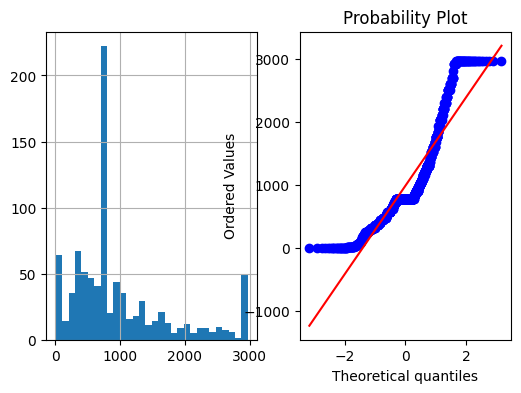

In [62]:
# Cuadratica

train_feature_data['Age_cuadratica']=train_feature_data['Age']**2
plot_sensisty_qq(train_feature_data,'Age_cuadratica')

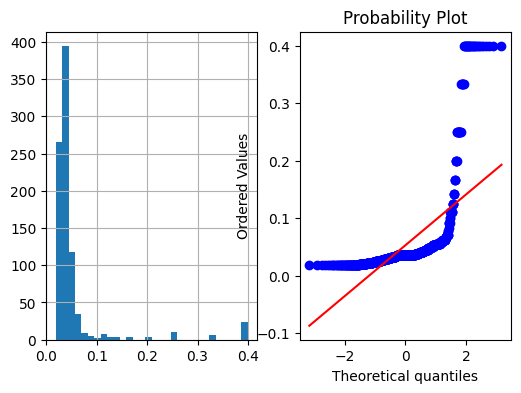

In [63]:
# Inversa

train_feature_data['Age_inversa']=1/train_feature_data['Age']
plot_sensisty_qq(train_feature_data,'Age_inversa')

In [64]:
train_feature_data

,Survived,Pclass,Age,SibSp,Parch,Sex_male,Age_BC,Age_cuadratica,Age_inversa
0,0,3,22.0,1,0,True,16.607195,484.0,0.045455
1,1,1,38.0,1,0,False,27.772193,1444.0,0.026316
2,1,3,26.0,0,0,False,19.461704,676.0,0.038462
3,1,1,35.0,1,0,False,25.724760,1225.0,0.028571
4,0,3,35.0,0,0,True,25.724760,1225.0,0.028571
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,True,20.167769,729.0,0.037037
887,1,1,19.0,0,0,False,14.430238,361.0,0.052632
888,0,3,28.0,1,2,False,20.871062,784.0,0.035714
889,1,1,26.0,0,0,True,19.461704,676.0,0.038462


In [94]:
train_feature_data=train_feature_data.drop(['Age_BC','Age_cuadratica','Age_inversa'], axis=1)

KeyError: "['Age_BC', 'Age_cuadratica', 'Age_inversa'] not found in axis"

### Escalado de Variables

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
train_feature_data

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True
...,...,...,...,...,...,...
886,0,2,27.0,0,0,True
887,1,1,19.0,0,0,False
888,0,3,28.0,1,2,False
889,1,1,26.0,0,0,True


In [126]:
scaler=MinMaxScaler()

scaler.fit(train_feature_data[['Age']])

train_feature_data['age_escalada']=scaler.transform(train_feature_data[['Age']])
test_feature_data['age_escalada']=scaler.transform(test_feature_data[['Age']])

In [127]:
train_feature_data

,Survived,Pclass,Age,SibSp,Parch,Sex_male,age_escalada
0,0,3,22.0,1,0,True,0.375000
1,1,1,38.0,1,0,False,0.682692
2,1,3,26.0,0,0,False,0.451923
3,1,1,35.0,1,0,False,0.625000
4,0,3,35.0,0,0,True,0.625000
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,True,0.471154
887,1,1,19.0,0,0,False,0.317308
888,0,3,28.0,1,2,False,0.490385
889,1,1,26.0,0,0,True,0.451923


In [128]:
train_feature_data=train_feature_data.drop(['Age'], axis=1)

In [129]:
train_feature_data.to_csv("../data/processed/train_feature_for_model_data.csv",index=False)

test_feature_data.to_csv("../data/processed/test_feature_for_model_data.csv",index=False)